Estimator bias refers to the difference between the expected (or average) prediction of a model and the true value that the model is trying to predict. Bias is one part of the total error in a model, with the other part being variance. Together, they form the basis of the bias-variance tradeoff.

Bias-Variance Tradeoff

Bias: Measures how much the average predictions of the model differ from the actual values. High bias indicates that the model makes strong assumptions about the data, potentially leading to underfitting. Underfitting occurs when the model is too simple to capture the underlying patterns in the data.

Variance: Measures how much the predictions for a given point vary between different realizations of the model. High variance indicates that the model is too sensitive to the fluctuations in the training data, potentially leading to overfitting. Overfitting occurs when the model captures noise in the training data rather than the actual underlying pattern.

*   Train Dataset : Used to fit the machine learning model.
*   Test Dataset : Used to evaluate the fit machine learning model.



* Underfitting
Definition: Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. This usually happens when the model has too few parameters or when it is trained for too few epochs.
Symptoms: High bias, poor performance on both the training set and the test set.

* Overfitting
Definition: Overfitting occurs when a model is too complex and captures not only the underlying patterns but also the noise in the data. This often happens when the model has too many parameters or is trained for too many epochs.
Symptoms: Low bias, but high variance. The model performs very well on the training set but poorly on the test set.

* Optimal Fitting
Definition: Optimal fitting occurs when a model is just right, capturing the underlying patterns without fitting the noise. This balance allows the model to generalize well to new, unseen data.
Symptoms: Low bias and low variance. Good performance on both the training set and the test set.






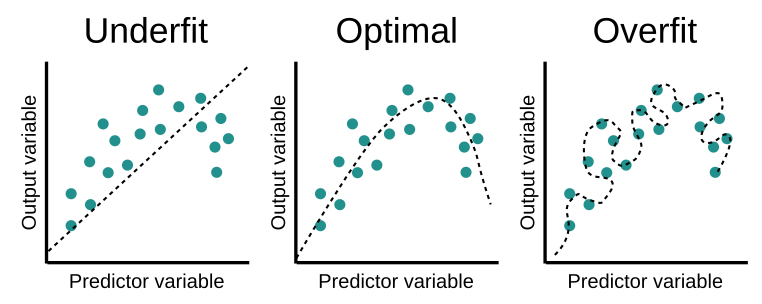

In [2]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

<ipython-input-2-a09c12aac4a0>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


 The **standard deviation** is a measure of the amount of variation or dispersion in a set of values. It indicates how much individual data points differ from the mean (average) of the dataset.

 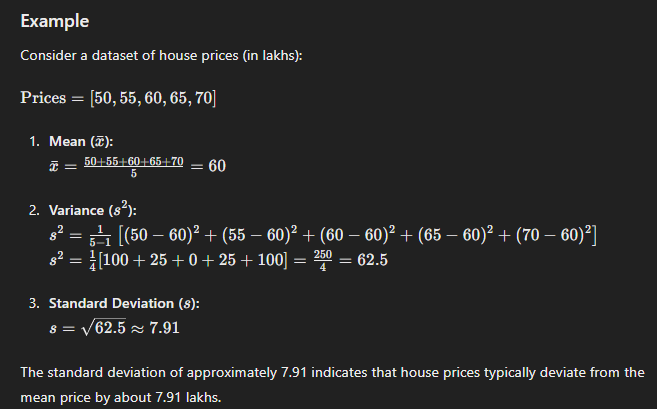

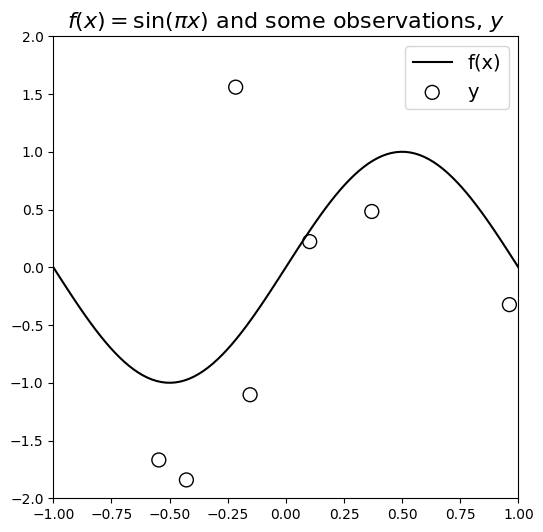

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(123)

# Define constants for plotting
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 10
NOISE_STD = 1.0

# Generate random x values uniformly distributed between -1 and 1
x = 2 * (np.random.rand(N_OBSERVATIONS) - 0.5)

# Generate a grid of x values for plotting the smooth function
x_grid = np.linspace(-1, 1, 100)

def f(x):
    """Base function: f(x) = sin(pi * x)"""
    return np.sin(x * np.pi)

def sample_fx_data(shape, noise_std=NOISE_STD):
    """Generate noisy samples of f(x)"""
    # Compute f(x) and add Gaussian noise
    return f(x) + np.random.randn(*shape) * noise_std

def plot_fx_data(y=None):
    """Plot the base function f(x) and noisy samples"""
    # If y is not provided, generate noisy data
    y = y if y is not None else sample_fx_data(x.shape)

    # Create a figure and axis for plotting
    fig, axs = plt.subplots(figsize=(6, 6))

    # Plot the smooth base function using x_grid
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')

    # Scatter plot of the noisy data points
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')

# Generate noisy data for the observations
y = sample_fx_data(x.shape)

# Plot the base function and the noisy data
plot_fx_data(y)

# Add legend with specified font size
plt.legend(fontsize=LEGEND_FONTSIZE)

# Add title with specified font size
plt.title('$f(x) = \sin(\pi x)$ and some observations, $y$', fontsize=TITLE_FONTISIZE)

# Set limits for the x and y axes
plt.xlim([-1, 1])
plt.ylim([-2, 2])

# Display the plot
plt.show()


Our goal is to characterize the function $f(x)$, but we don’t know the function form of $f(x)$, we must instead estimate some other function $g(x)$ that we believe will provide an accurate approximation to $f(x)$. The function $g(x)$ is called an estimator of $f(x)$. In general, an estimator is some parameterized model that can capture a wide range of functional forms. **One such class of estimators is the weighted combination of ordered polynomials**:

$g_{D}(x)=θ_{0} + θ_{1}x + θ_{2}x^{2} + … + θ_{D}x^{D}$

As the polynomial order D increases, the functions $g_{D}(x)$ are able to capture increasingly complex behavior. For example, $g_{0}(x)$ desribes a horizontal line with an adjustable vertical offset $θ_{0}$,  $g_{1}(x)$ describes a line with adjustable vertical offset $θ_{0}$ and adjustable linear slope $θ_{1}$, $g_{2}(x)$ describes a function that also includes a weight on the quadratic term $θ_{2}$. We thus try to fit the values of the parameters for a given estimator $g_{D}(x)$ to best account for observed data in the hopes that we will also accurately approximate $f(x)$.

Below we estimate the parameters of three polynomial model functions of increasing complexity (using Numpy’s <code>polyfit</code>) to the sampled data displayed above. Specifically, we estimate the functions $g_{1}(x)$ , $g_{3}(x)$ and $g_{10}(x)$

In [6]:
import warnings
warnings.filterwarnings("ignore")

<ipython-input-4-e61b22cc6aa2>:15: RankWarning: Polyfit may be poorly conditioned
  theta[degree] = np.polyfit(x, y, degree)


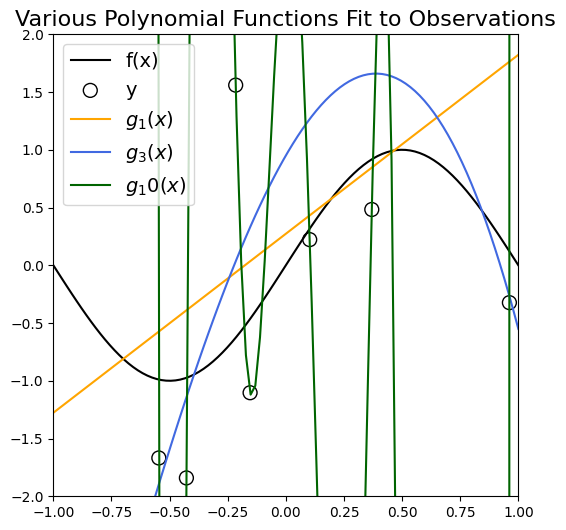

In [4]:
# Plot the base function f(x) and the noisy data points
plot_fx_data(y)

# List of polynomial degrees to fit
polynomial_degrees = [1, 3, 10]

# Dictionaries to store polynomial coefficients and fitted values
theta = {}
fit = {}

# Loop over the polynomial degrees
for ii, degree in enumerate(polynomial_degrees):
    # Fit a polynomial of the given degree to the data points (x, y)
    # Note: We may get an overfitting warning for degree 10 because it can fit the noise too closely
    theta[degree] = np.polyfit(x, y, degree)

    # Evaluate the polynomial at the x_grid points
    fit[degree] = np.polyval(theta[degree], x_grid)

    # Plot the fitted polynomial line
    # Use a different color for each degree
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{degree}(x)$")

plt.legend(fontsize=LEGEND_FONTSIZE)

# Set limits for the x and y axes
plt.xlim([-1, 1])
plt.ylim([-2, 2])

plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

plt.show()



Qualitatively, we see that the estimator  g1(x) (orange line) provides a poor fit to the observed data, as well as a poor approximation to the function  f(x)  (black curve). We see that the estimator  g10(x)  (green curve) provides a very accurate fit to the data points, but varies wildly to do so, and therefore provides an inaccurate approximation of  f(x) . Finally, we see that the estimator  g3(x) (blue curve) provides a fairly good fit to the observed data, and a much better job at approximating  f(x) .

Our original goal was to approximate  f(x) , not the data points per se. Therefore  g3(x) , at least qualitatively, provides a more desirable estimate of  f(x)  than the other two estimators. The fits for  g1(x)  and  g10(x)  are examples of “underfitting” and “overfitting” to the observed data, respectively:

Underfitting occurs when an estimator  g(x)  is not flexible enough to capture the underlying trends in the observed data.

Overfitting occurs when an estimator is too flexible, allowing it to capture illusory trends in the data. These illusory trends are often the result of the noise in the observations  y .

Estimator - An estimator in machine learning is a model or algorithm that can learn from data and make predictions.

 Estimation Process: The process involves using data to estimate the parameters or structure of a model. This includes both supervised learning (estimating the relationship between input features and target labels) and unsupervised learning (estimating the underlying structure or distribution of data).

Fitting and Predicting:
Fit Method: fit(X, y) method trains the estimator using the training data X and corresponding labels y.

Predict Method: predict(X) method makes predictions on new data X using the learned parameters from the fit method.

Transform Method: For some estimators, transform(X) is used to transform the input data (e.g., scaling, PCA).

**Bias and Variance of an Estimator**
The model fits for  gD(x)  discussed above were based on a single, randomly-sampled data set of observations  y . However, because  ϵ  is a random variable, there are in principle a potentially infinite number of ranndom data sets that can be observed. In order to determine a good model of  f(x) , it would be helpful to have an idea of how an estimator will perform on any or all of these potential datasets. To get an idea of how each of the estimators discussed above performs in general we can repeat the model fitting procedure for many data sets.

Here we perform such an analyses, sampling  50  independent data sets, then fitting the parameters for the polynomial functions of model order  D=(1,3,10)  to each dataset.

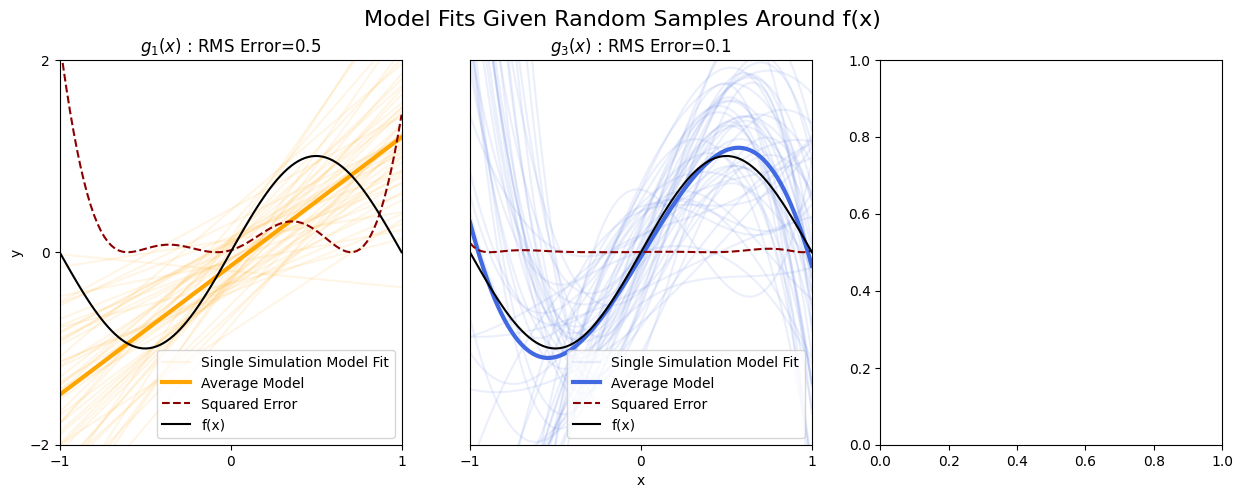

In [5]:
from collections import defaultdict

# Number of simulations to run
n_simulations = 50

# Dictionary to store fits for each polynomial degree across all simulations
simulation_fits = defaultdict(list)

# Run simulations
for sim in range(n_simulations):
    # Generate a new set of noisy samples from the base function f(x)
    y_simulation = sample_fx_data(x.shape)
    for degree in polynomial_degrees[:-1]:
        # Fit a polynomial of the given degree to the noisy samples
        # Note: We may get an overfitting warning for high degrees
        theta_tmp = np.polyfit(x, y_simulation, degree)
        # Evaluate the fitted polynomial at the x_grid points and store the fit
        simulation_fits[degree].append(np.polyval(theta_tmp, x_grid))

# Define an error function to calculate squared error
def error_function(pred, actual):
    return (pred - actual) ** 2

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the results for each polynomial degree (excluding the highest degree)
for ii, degree in enumerate(polynomial_degrees[:-1]):
    # Select the subplot
    plt.sca(axs[ii])

    # Plot each polynomial fit from the simulations with low opacity
    for jj, fit in enumerate(simulation_fits[degree]):
        label = 'Single Simulation Model Fit' if jj == 0 else None
        plt.plot(x_grid, fit, color=POLYNOMIAL_FIT_COLORS[ii], alpha=.1, label=label)

    # Calculate and plot the average fit across all simulations
    average_fit = np.array(simulation_fits[degree]).mean(0)
    squared_error = error_function(average_fit, f(x_grid))
    rms = np.sqrt(np.mean(squared_error))
    plt.plot(x_grid, average_fit, color=POLYNOMIAL_FIT_COLORS[ii], linewidth=3, label='Average Model')

    # Plot the squared error between the average fit and the true function
    plt.plot(x_grid, squared_error, '--', color=ERROR_COLOR, label='Squared Error')

    # Plot the true function f(x)
    plt.plot(x_grid, f(x_grid), color='black', label='f(x)')

    # Customize y-ticks
    plt.yticks([])

    # Add x-label only to the middle plot
    if ii == 1:
        plt.xlabel('x')
    # Add y-label only to the first plot and set y-ticks
    elif ii == 0:
        plt.ylabel('y')
        plt.yticks([-2, 0, 2])

    # Set the x and y axis limits
    plt.xlim([-1, 1])
    plt.ylim([-2, 2])
    plt.xticks([-1, 0, 1])

    # Add a title to the subplot showing the RMS error
    plt.title(f"$g_{degree}(x)$ : RMS Error={np.round(rms, 1)}")

    # Add a legend to the subplot
    plt.legend(loc='lower right')

# Add a main title to the entire figure
plt.suptitle('Model Fits Given Random Samples Around f(x)', fontsize=TITLE_FONTISIZE)

# Display the plot
plt.show()


Estimator Bias
We see that for the estimator  g1(x) (light orange curves), model fits do not vary too dramatically from data set to data set. Thus the averaged estimator fit over all the data sets (dark orange curve), formally written as  E[g(x)] , is similar (in terms of slope and vertical offset) to each of the individual fits.

A commonly-used statistical metric that tries to assess the average accuracy of an estimator  g(x)  at approximating a target function  f(x)  is what is called the bias of the estimator. Formally defined as:
bias=E[g(x)]−f(x)

# **The bias describes how much the average estimator fit over many datasets  E[g(x)]  deviates from the value of the actual underlying target function  f(x) .**

We can see from the plot for  g1(x)  that  E[g1(x)]  deviates significantly from  f(x) . Thus we can say that the estimator  g1(x)  exhibits large bias when approximating the function  f(x) .

# **When averaging over the individual fits for the estimator  g3(x)  (blue curves), we find that the average estimator  E[g3(x) (dark blue curve) accurately approximates the true function  f(x) , indicating that the estimator  g3(x)  has low bias.**

# **Estimator Variance**
estimator variance refers to the variability of predictions that an estimator
produces when trained on different subsets of the data. It measures how **much the predictions for a given point vary as the training data changes**.

High estimator variance implies that small changes in the training data can lead to significant changes in the predictions, indicating that the model may be overly sensitive to the specific training data it was trained on. On the other hand, low estimator variance suggests that the model's predictions are relatively stable across different subsets of the data.

Reducing estimator variance is one of the goals of techniques like regularization, ensemble methods (such as bagging and boosting), and cross-validation, which help create more robust and stable models.

Another common statistical metric attempts to capture the average consistency of an estimator when fit to multiple datasets. This metric, referred to as the variance of the estimator is formally defined as variance =  E[(g(x)−E[g(x)])2]

The variance is the expected (i.e. average) squared difference between any single dataset-dependent estimate of  g(x)  and the average value of  g(x)  estimated over all datasets,  E[g(x)]

According to the definition of variance, we can say that the estimator  g1(x)  exhibits low variance because the each individual  g1(x)  is fairly similar across datasets.

Investigating the results for the estimator  g10(x)  (green curves), we see that each individual model fit varies dramatically from one data set to another. Thus we can say that this estimator exhibits high variance.

We established earlier that the estimator  g3(x)  provided a qualitatively better fit to the function  f(x)  than the other two polynomial estimators for a single dataset. It appears that this is also the case over many datasets. We also find that estimator  g3(x)  exhibits low bias and low variance, whereas the other two, less-desirable estimators, have either high bias or high variance. Thus it would appear that having both low bias and low variance is a reasonable criterion for selecting an accurate model of  f(x) .

# <b><u>Expected Prediction Error and the Bias-variance Tradeoff</u></b>
For a given estimator $g(x)$ fit to a data set of $x-y$ pairs , we would like to know, given all the possible datasets out there, what is the expected prediction error we will observe for a new data point $x^*$, $y^* = f(x)+ ϵ$. If we define prediction error to be the squared difference in model prediction $g(x^*)$ and observations $y^*$, the expected prediction error is then:

$E[(g(x^*)−y^*)2]$ = $E[(g(x^*) - E[g(x^*))^{2}]$  + $(E[(g(x^*)]  - f(x^*))^{2}$+ $E[(y^* - f(x^*))^2]$

## $Error = Variance + Bias^{2} + Irreducible \ error$

* The first term is the variance of the estimator introduced above.
* The second term is the squared bias of the estimator, also introduced above.
* The third term is the variance of the observation noise and describes how much the observations $y$ vary from the true function $f(x)$. Notice that the noise term does not depend on the estimator $g(x)$. This means that the noise term is a constant that places a lower bound on expected prediction error, and in particular is equal to the variance the noise term $σ^{2}_{ϵ}$


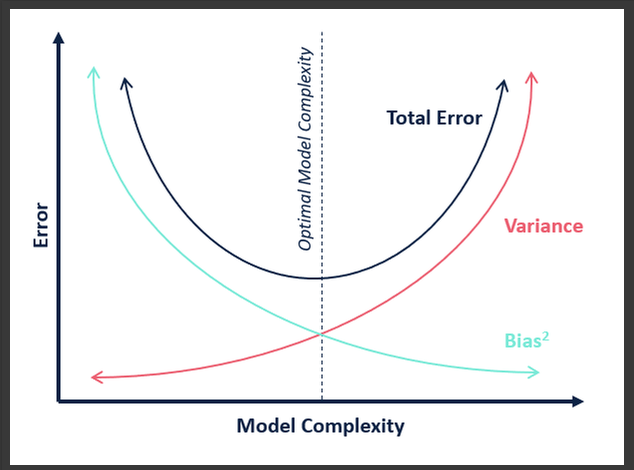

# <b><u>Demonstration of the Bias-variance Tradeoff </u></b>

Below we demonstrate the findings presented above with another set of simulations. We simulate 100 independent datasets, each with 25 $x-y$ pairs; the samples $y$ have a noise variance = 0.25. We then partition each dataset into two non-overlapping sets:

* a Training Set using for fitting model parameters
* a Testing Set used to estimate the model prediction error

We then fit the parameters for estimators of varying complexity. Complexity is varied by using polynomial functions that range in model order from 1 (least complex) to 12 (most complex). We then calculate and display the squared bias, variance, and prediction error on testing set for each of the estimators:

np.ceil is a NumPy function that returns the ceiling value of each element in an array. The ceiling of a number is the smallest integer greater than or equal to that number.

import numpy as np

# Ceil of a single value
print(np.ceil(4.3))  # Output: 5.0

# Ceil of an array
arr = np.array([2.7, 3.4, 5.1])
print(np.ceil(arr))  # Output: [3. 4. 6.]


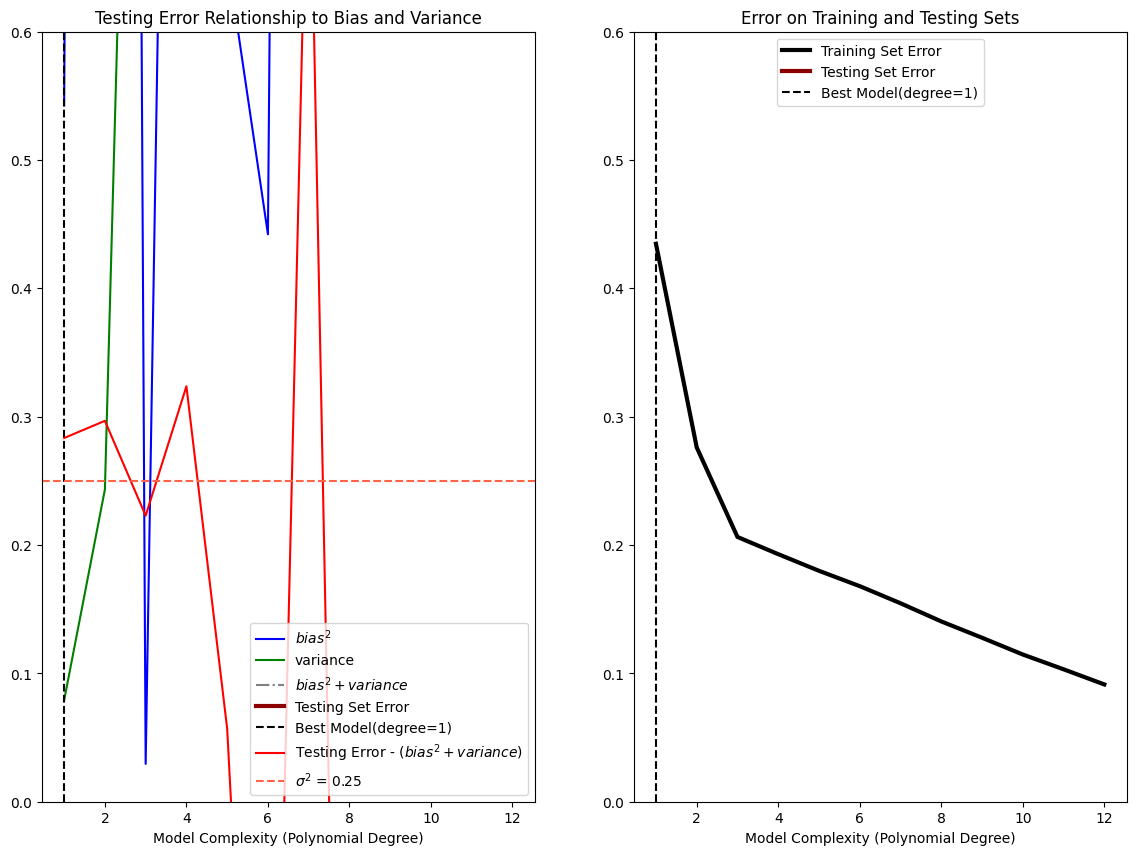

In [6]:
# Set the random seed for reproducibility
np.random.seed(124)

# Number of observations per dataset
n_observations_per_dataset = 25
# Number of datasets
n_datasets = 100
# Maximum polynomial degree for the models
max_poly_degree = 12
# Range of polynomial degrees to explore
model_poly_degrees = range(1, max_poly_degree + 1)

# Standard deviation of the noise
NOISE_STD = .5
# Percentage of data to use for training
percent_train = .8
# Number of training samples
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create evenly spaced values for the input data
x = np.linspace(-1, 1, n_observations_per_dataset)

# Split the input data into training and testing sets
x_train = x[:n_train]
x_test = x[n_train:]

# Initialize dictionaries to store results
theta_hat = defaultdict(list)
pred_train = defaultdict(list)
pred_test = defaultdict(list)
train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Loop over datasets
for dataset in range(n_datasets):
    # Simulate training/testing targets with noise
    y_train = f(x_train) + NOISE_STD * np.random.randn(x_train.shape[0])
    y_test = f(x_test) + NOISE_STD * np.random.randn(x_test.shape[0])

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model using polynomial regression
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Make predictions on test set
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Calculate Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))

# Function to calculate squared bias of estimator
def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]
    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)

# Function to calculate estimator variance
def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]
    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)

# Calculate metrics for each model complexity
complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

# Find the best model degree with minimum testing error
best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]

# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^{2}$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance), linestyle='-.', color='gray', label='$bias^{2} + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^{2} + variance$)')
plt.axhline(NOISE_STD ** 2, color='tomato', linestyle='--', label=f'$\sigma^{2}$ = {round(NOISE_STD**2, 3)}')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6])
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

# Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6])
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')


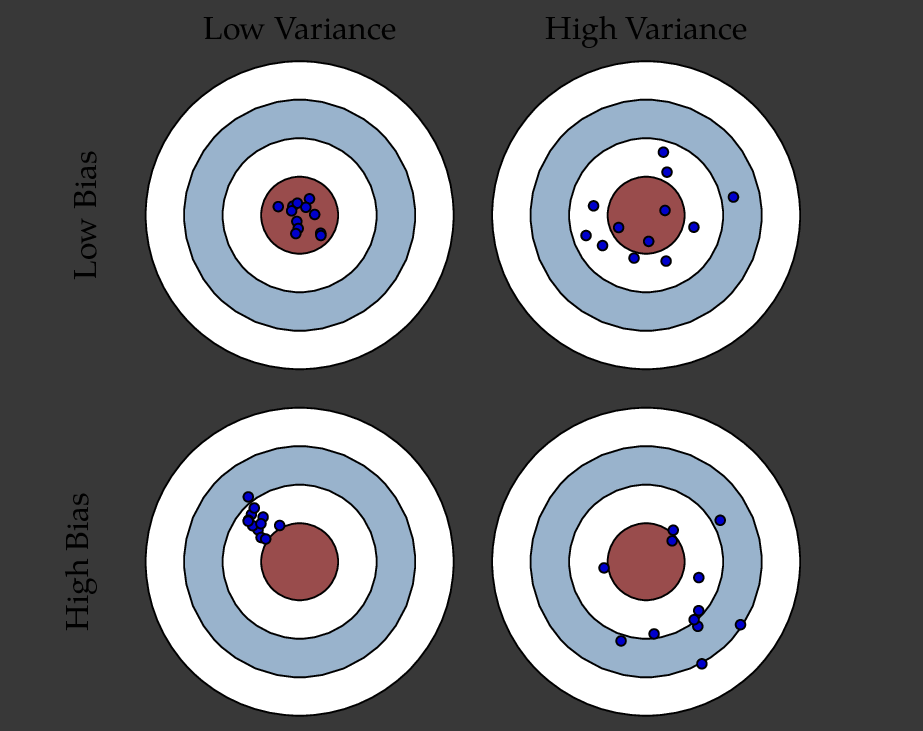

# What types of error does bias cause in a model?
Over Generalization
Underfitting

# Including relevant lagged values of the dependent variable on the right hand side of a regression equation could lead to which one of the following?
Biased but consistent coefficient estimates

# Which of the following step / assumption in regression modeling impacts the trade-off between under-fitting and over-fitting the most?
The polynomial degree

# Suppose the model is demonstrating the high variance across different training sets. Which of the following is not a valid way to reduce the variance?
Increase the optimization algorithm being used for error minimisation


# Regarding bias and variance, which of the following statements are true? (Here ‘high’ and ‘low’ are relative to the ideal model.)
Models which overfit have a low bias.
Models which underfit have a low variance

# We use a validation and test set to avoid the bias and variance.
True

# Mean of the squares of the deviations from mean is called the:
Variance

# What do you expect will happen with bias and variance as you increase the size of training data?
Bias increases and Variance decreases